In [1]:
#|default_exp app

In [22]:
#|export
import gradio as gr
from fastai.vision.all import *

In [23]:
#|export
learn = load_learner('./export.pkl')

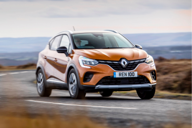

In [16]:
im = PILImage.create('suv.jpg')
im.thumbnail((192,192))
im

In [20]:
learn.predict(im)

('suv', tensor(2), tensor([1.5373e-05, 4.8655e-05, 9.9994e-01]))

In [12]:
learn.dls.vocab

['lego', 'sport', 'suv']

In [24]:
#|export
categories =('lego', 'sport', 'suv')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [25]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['lego.jpg','sport.jpg','suv.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

C:\Users\gavin\AppData\Local\Temp\ipykernel_11068\3764290743.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
C:\Users\gavin\AppData\Local\Temp\ipykernel_11068\3764290743.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
C:\Users\gavin\AppData\Local\Temp\ipykernel_11068\3764290743.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
C:\Users\gavin\AppData\Local\Temp\ipykernel_11068\3764290743.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [28]:
import nbdev
nbdev.export.nb_export('carClassifierApp.ipynb', 'app')